In [2]:
pip install mysql-connector-python pandas numpy matplotlib seaborn

   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.5 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/16.5 MB 5.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.9/16.5 MB 5.2 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/16.5 MB 5.6 MB/s eta 0:00:03
   ------------- -------------------------- 5.8/16.5 MB 5.9 MB/s eta 0:00:02
   ----------------- ---------------------- 7.1/16.5 MB 6.1 MB/s eta 0:00:02
   -------------------- ------------------- 8.7/16.5 MB 6.2 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.5 MB 6.3 MB/s eta 0:00:02
   --------------------------- ------------ 11.5/16.5 MB 6.4 MB/s eta 0:00:01
   ------------------------------- -------- 13.1/16.5 MB 6.5 MB/s eta 0:00:01
   ---------------------------------- ----- 14.4/16.5 MB 6.5 MB/s eta 0:00:01
   ------

In [12]:
import mysql.connector
import pandas as pd

try:
    connection = mysql.connector.connect(
        host='localhost',
        port=3306,
        user='root',
        password='rakhi',  # ⚠️ Change this!
        database='sales'
    )
    
    if connection.is_connected():
        print("✅ Successfully connected to MySQL database!")
        print(f"Database: {connection.database}")
        
        # Test query
        cursor = connection.cursor()
        cursor.execute("SELECT COUNT(*) FROM transactions")
        count = cursor.fetchone()
        print(f"Total transactions: {count[0]}")
        
        cursor.close()
        connection.close()
        print("✅ Connection closed successfully")
    
except mysql.connector.Error as error:
    print(f"❌ Error: {error}")
    print("\n💡 Tip: Make sure you entered the correct password!")

✅ Successfully connected to MySQL database!
Database: sales
Total transactions: 148395
✅ Connection closed successfully


In [8]:
import mysql.connector

try:
    connection = mysql.connector.connect(
        host='localhost',
        port=3306,
        user='root',
        password='rakhi',  # Your password
        database='sales_insights'
    )
    
    cursor = connection.cursor()
    cursor.execute("SHOW TABLES")
    
    print("📋 Tables in sales_insights database:")
    tables = cursor.fetchall()
    
    if len(tables) == 0:
        print("  ⚠️ No tables found! Database is empty.")
    else:
        for table in tables:
            print(f"  - {table[0]}")
    
    cursor.close()
    connection.close()
    
except mysql.connector.Error as error:
    print(f"❌ Error: {error}")

📋 Tables in sales_insights database:
  ⚠️ No tables found! Database is empty.


In [10]:
import mysql.connector

try:
    connection = mysql.connector.connect(
        host='localhost',
        port=3306,
        user='root',
        password='rakhi',  # Use whatever password worked for you
    )
    
    cursor = connection.cursor()
    cursor.execute("SHOW DATABASES")
    
    print("📋 Available Databases:")
    for db in cursor:
        print(f"  - {db[0]}")
    
    cursor.close()
    connection.close()
    
except mysql.connector.Error as error:
    print(f"❌ Error: {error}")

📋 Available Databases:
  - assign1
  - assign2
  - assign3
  - assign4
  - bank_db
  - dbms
  - dilb1
  - information_schema
  - joints
  - learning
  - learning2
  - mysql
  - office
  - performance_schema
  - practice
  - sales
  - sales_insights
  - store
  - sys
  - tt3


In [14]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("="*60)
print("  ATLIQ HARDWARE - PYTHON DATA ANALYSIS")
print("="*60)

  ATLIQ HARDWARE - PYTHON DATA ANALYSIS


In [20]:
# Create database connection
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='localhost',
            port=3306,
            user='root',
            password='rakhi',  # Change if needed
            database='sales'  # Your database name
        )
        return connection
    except mysql.connector.Error as error:
        print(f"❌ Error: {error}")
        return None

# Extract all data
print("\n📊 Step 1: Extracting data from MySQL database...")

connection = create_connection()

if connection:
    # Extract transactions (INR only)
    query_transactions = """
    SELECT * FROM transactions
    WHERE currency = 'INR'
    """
    df_transactions = pd.read_sql(query_transactions, connection)
    print(f"Transactions: {len(df_transactions):,} rows")
    
    # Extract customers
    df_customers = pd.read_sql("SELECT * FROM customers", connection)
    print(f" Customers: {len(df_customers):,} rows")
    
    # Extract products
    df_products = pd.read_sql("SELECT * FROM products", connection)
    print(f"Products: {len(df_products):,} rows")
    
    # Extract markets
    df_markets = pd.read_sql("SELECT * FROM markets", connection)
    print(f"Markets: {len(df_markets):,} rows")
    
    # Extract date
    df_date = pd.read_sql("SELECT * FROM date", connection)
    print(f" Date dimension: {len(df_date):,} rows")
    
    connection.close()
    print("\n  All data extracted successfully!")
else:
    print("❌ Failed to connect to database")





📊 Step 1: Extracting data from MySQL database...
Transactions: 148,393 rows
 Customers: 38 rows
Products: 279 rows
Markets: 17 rows
 Date dimension: 1,126 rows

  All data extracted successfully!


In [22]:
print("\n🧹 Step 2: Cleaning and merging data...")

# Convert date to datetime
df_transactions['order_date'] = pd.to_datetime(df_transactions['order_date'])

# Remove negative/zero sales
initial_rows = len(df_transactions)
df_transactions = df_transactions[df_transactions['sales_amount'] > 0]
removed = initial_rows - len(df_transactions)
print(f" Removed {removed:,} rows with invalid sales amounts")

# Merge all datasets
df_merged = df_transactions.merge(
    df_customers,
    on='customer_code',
    how='left'
).merge(
    df_products,
    on='product_code',
    how='left'
).merge(
    df_markets,
    left_on='market_code',
    right_on='markets_code',
    how='left'
)

print(f" Merged dataset created: {len(df_merged):,} rows, {len(df_merged.columns)} columns")

# Add useful columns
df_merged['year'] = df_merged['order_date'].dt.year
df_merged['month'] = df_merged['order_date'].dt.month
df_merged['month_name'] = df_merged['order_date'].dt.strftime('%B')
df_merged['year_month'] = df_merged['order_date'].dt.to_period('M').astype(str)

print("✅ Added date columns (year, month, month_name)")


🧹 Step 2: Cleaning and merging data...
 Removed 0 rows with invalid sales amounts
 Merged dataset created: 148,393 rows, 16 columns
✅ Added date columns (year, month, month_name)


In [24]:
print("\n" + "="*60)
print("📈 SALES PERFORMANCE SUMMARY")
print("="*60)

# Overall metrics
total_revenue = df_merged['sales_amount'].sum()
total_profit = df_merged['profit_margin'].sum()
total_transactions = len(df_merged)
avg_order_value = df_merged['sales_amount'].mean()
profit_margin_pct = (total_profit / total_revenue) * 100

print(f"\n FINANCIAL METRICS:")
print(f"  Total Revenue:        ₹{total_revenue:,.2f} ({total_revenue/10000000:.2f} Crores)")
print(f"  Total Profit:         ₹{total_profit:,.2f} ({total_profit/100000:.2f} Lakhs)")
print(f"  Profit Margin:        {profit_margin_pct:.2f}%")
print(f"  Total Transactions:   {total_transactions:,}")
print(f"  Average Order Value:  ₹{avg_order_value:,.2f}")

# Year-wise performance
print(f"\n YEAR-WISE PERFORMANCE:")
yearly = df_merged.groupby('year').agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'product_code': 'count'
}).round(2)
yearly.columns = ['Revenue', 'Profit', 'Transactions']
yearly['Profit_Margin_%'] = ((yearly['Profit'] / yearly['Revenue']) * 100).round(2)
print(yearly)


📈 SALES PERFORMANCE SUMMARY

 FINANCIAL METRICS:
  Total Revenue:        ₹984,812,713.00 (98.48 Crores)
  Total Profit:         ₹24,642,255.91 (246.42 Lakhs)
  Profit Margin:        2.50%
  Total Transactions:   148,393
  Average Order Value:  ₹6,636.52

 YEAR-WISE PERFORMANCE:
          Revenue       Profit  Transactions  Profit_Margin_%
year                                                         
2017   92881903.0   2758255.53         14555             2.97
2018  413687163.0   9337296.15         60755             2.26
2019  336019102.0  10486543.89         51712             3.12
2020  142224545.0   2060160.34         21371             1.45


In [26]:
print("\n" + "="*60)
print("👥 TOP 10 CUSTOMERS BY REVENUE")
print("="*60)

top_customers = df_merged.groupby('customer_code').agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'product_code': 'count'
}).round(2).sort_values('sales_amount', ascending=False).head(10)

top_customers.columns = ['Revenue', 'Profit', 'Orders']
top_customers['Revenue_Crores'] = (top_customers['Revenue'] / 10000000).round(2)
top_customers['Profit_Lakhs'] = (top_customers['Profit'] / 100000).round(2)
top_customers['Margin_%'] = ((top_customers['Profit'] / top_customers['Revenue']) * 100).round(2)

print(top_customers[['Revenue_Crores', 'Profit_Lakhs', 'Margin_%', 'Orders']])


👥 TOP 10 CUSTOMERS BY REVENUE
               Revenue_Crores  Profit_Lakhs  Margin_%  Orders
customer_code                                                
Cus006                  41.33         93.08      2.25   13819
Cus022                   4.96         16.88      3.40    4686
Cus003                   4.91          6.80      1.38    9236
Cus005                   4.49         10.39      2.31   19936
Cus020                   4.39         17.86      4.07   17327
Cus007                   3.51          3.14      0.90    6017
Cus027                   3.18          8.26      2.60    2182
Cus001                   2.86          6.56      2.29    4971
Cus008                   2.12          3.21      1.51    1384
Cus014                   2.10          5.61      2.67    1612


In [28]:
print("\n" + "="*60)
print("🗺️ TOP 10 MARKETS BY REVENUE")
print("="*60)

top_markets = df_merged.groupby(['markets_name', 'zone']).agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'product_code': 'count'
}).round(2).sort_values('sales_amount', ascending=False).head(10)

top_markets.columns = ['Revenue', 'Profit', 'Transactions']
top_markets['Revenue_Crores'] = (top_markets['Revenue'] / 10000000).round(2)
top_markets['Profit_Lakhs'] = (top_markets['Profit'] / 100000).round(2)

print(top_markets[['Revenue_Crores', 'Profit_Lakhs', 'Transactions']])


🗺️ TOP 10 MARKETS BY REVENUE
                      Revenue_Crores  Profit_Lakhs  Transactions
markets_name zone                                               
Delhi NCR    North             51.95        119.39         44217
Mumbai       Central           15.01         48.73         11321
Ahmedabad    North             13.23         28.48         20035
Bhopal       Central            5.86         22.87         13322
Nagpur       Central            5.50         14.12         47670
Kochi        South              1.88          7.03          4920
Chennai      South              1.80          3.01          1028
Kanpur       North              1.36         -0.66          2811
Hyderabad    South              0.74          0.47          2034
Patna        North              0.44          1.82           402


In [30]:
print("\n" + "="*60)
print("🔴 NEGATIVE PROFIT ANALYSIS")
print("="*60)

negative_profit = df_merged[df_merged['profit_margin'] < 0]
positive_profit = df_merged[df_merged['profit_margin'] >= 0]

print(f"\n TRANSACTION BREAKDOWN:")
print(f"  Total Transactions:       {len(df_merged):,}")
print(f"  Profitable Transactions:  {len(positive_profit):,} ({len(positive_profit)/len(df_merged)*100:.1f}%)")
print(f"  Loss-making Transactions: {len(negative_profit):,} ({len(negative_profit)/len(df_merged)*100:.1f}%)")

print(f"\n FINANCIAL IMPACT:")
print(f"  Revenue from losses:      ₹{negative_profit['sales_amount'].sum():,.2f}")
print(f"  Total loss amount:        ₹{negative_profit['profit_margin'].sum():,.2f}")
print(f"  Profit from good sales:   ₹{positive_profit['profit_margin'].sum():,.2f}")


🔴 NEGATIVE PROFIT ANALYSIS

 TRANSACTION BREAKDOWN:
  Total Transactions:       148,393
  Profitable Transactions:  79,892 (53.8%)
  Loss-making Transactions: 68,501 (46.2%)

 FINANCIAL IMPACT:
  Revenue from losses:      ₹459,414,589.00
  Total loss amount:        ₹-81,331,664.92
  Profit from good sales:   ₹105,973,920.83



📊 CREATING VISUALIZATIONS

✅ Dashboard saved as 'sales_dashboard.png'


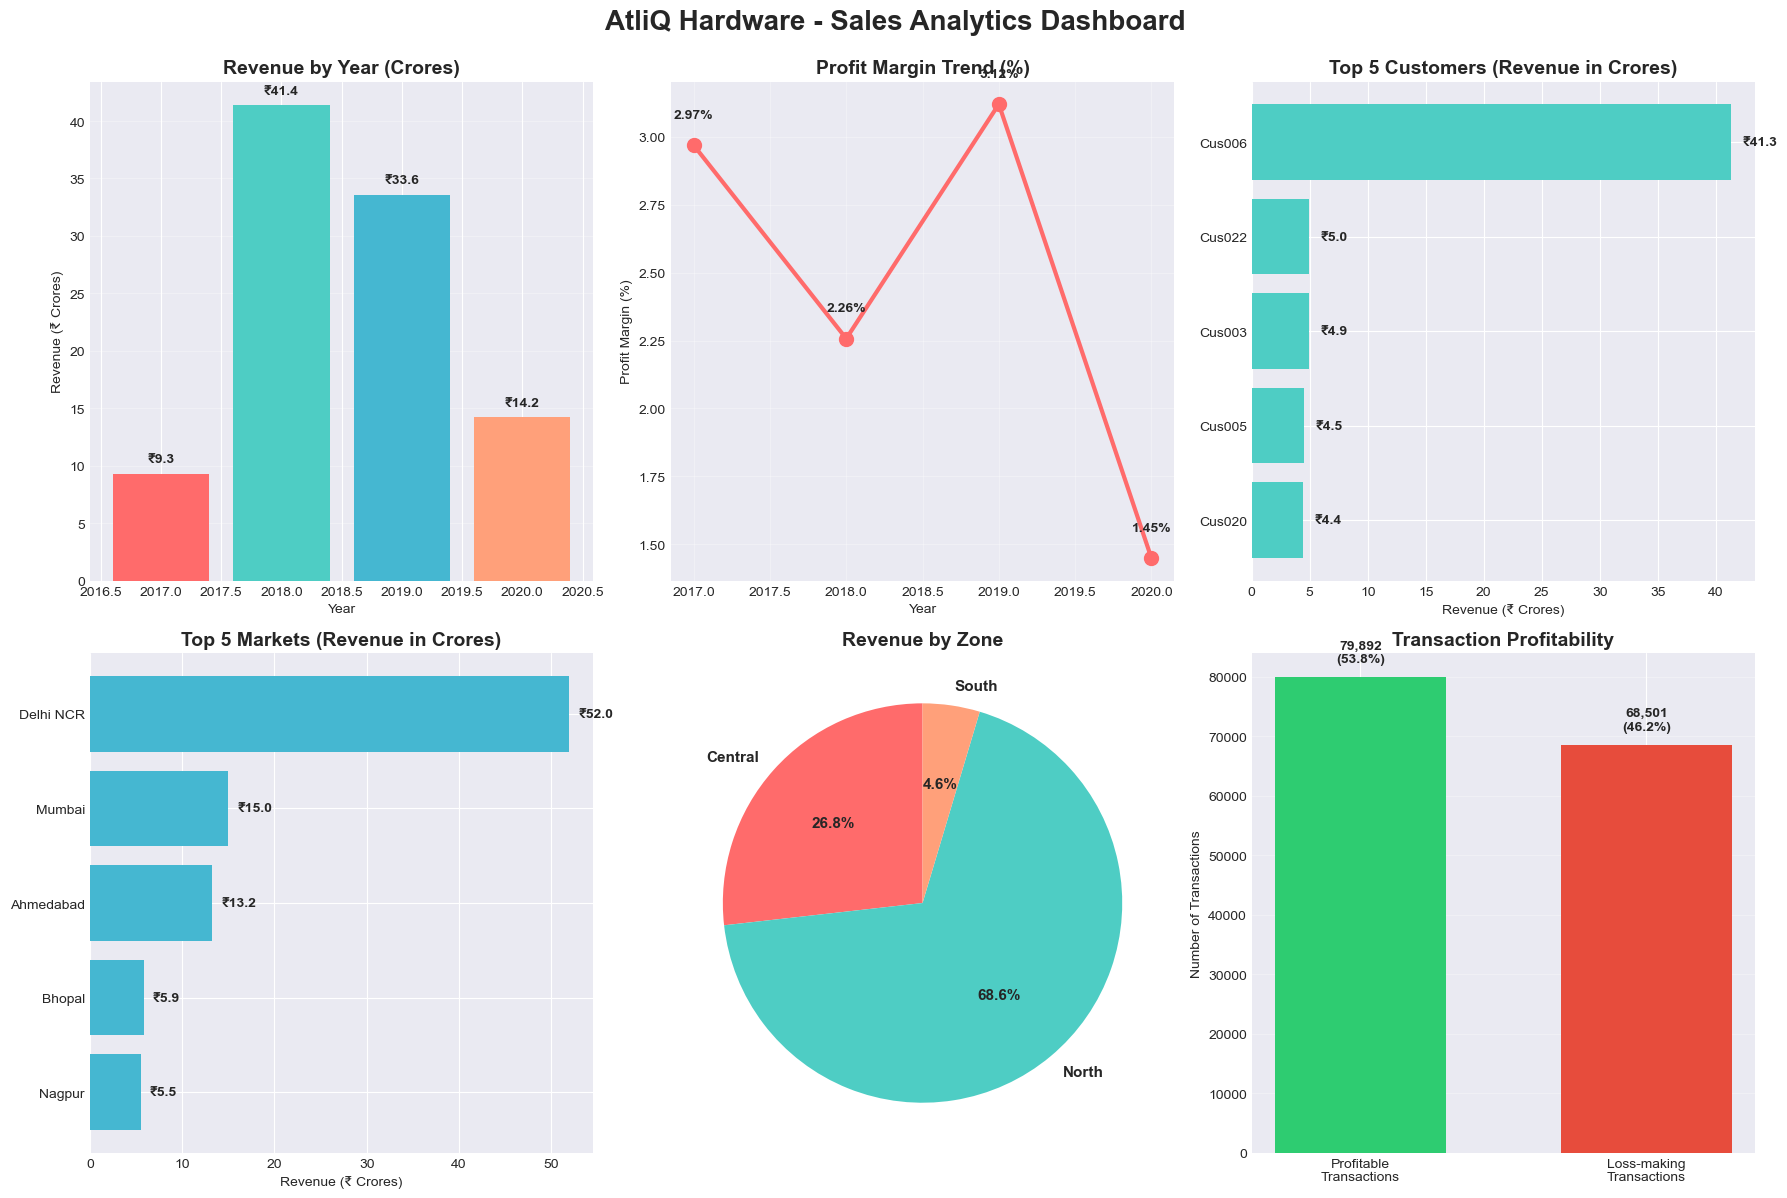


✅ Visualizations created successfully!


In [32]:
print("\n" + "="*60)
print("📊 CREATING VISUALIZATIONS")
print("="*60)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))
fig.suptitle('AtliQ Hardware - Sales Analytics Dashboard', fontsize=20, fontweight='bold', y=0.995)

# 1. Revenue by Year
ax1 = plt.subplot(2, 3, 1)
yearly_revenue = df_merged.groupby('year')['sales_amount'].sum() / 10000000
ax1.bar(yearly_revenue.index, yearly_revenue.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax1.set_title('Revenue by Year (Crores)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue (₹ Crores)')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(yearly_revenue.values):
    ax1.text(yearly_revenue.index[i], v + 1, f'₹{v:.1f}', ha='center', fontweight='bold')

# 2. Profit Margin by Year
ax2 = plt.subplot(2, 3, 2)
yearly_data = df_merged.groupby('year').agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum'
})
yearly_data['margin_%'] = (yearly_data['profit_margin'] / yearly_data['sales_amount'] * 100)
ax2.plot(yearly_data.index, yearly_data['margin_%'], marker='o', linewidth=3, markersize=10, color='#FF6B6B')
ax2.set_title('Profit Margin Trend (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit Margin (%)')
ax2.grid(True, alpha=0.3)
for i, v in enumerate(yearly_data['margin_%'].values):
    ax2.text(yearly_data.index[i], v + 0.1, f'{v:.2f}%', ha='center', fontweight='bold')

# 3. Top 5 Customers
ax3 = plt.subplot(2, 3, 3)
top5_customers = df_merged.groupby('customer_code')['sales_amount'].sum().sort_values(ascending=False).head(5) / 10000000
ax3.barh(range(len(top5_customers)), top5_customers.values, color='#4ECDC4')
ax3.set_yticks(range(len(top5_customers)))
ax3.set_yticklabels(top5_customers.index)
ax3.set_title('Top 5 Customers (Revenue in Crores)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Revenue (₹ Crores)')
ax3.invert_yaxis()
for i, v in enumerate(top5_customers.values):
    ax3.text(v + 1, i, f'₹{v:.1f}', va='center', fontweight='bold')

# 4. Top 5 Markets
ax4 = plt.subplot(2, 3, 4)
top5_markets = df_merged.groupby('markets_name')['sales_amount'].sum().sort_values(ascending=False).head(5) / 10000000
ax4.barh(range(len(top5_markets)), top5_markets.values, color='#45B7D1')
ax4.set_yticks(range(len(top5_markets)))
ax4.set_yticklabels(top5_markets.index)
ax4.set_title('Top 5 Markets (Revenue in Crores)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Revenue (₹ Crores)')
ax4.invert_yaxis()
for i, v in enumerate(top5_markets.values):
    ax4.text(v + 1, i, f'₹{v:.1f}', va='center', fontweight='bold')

# 5. Zone-wise Revenue
ax5 = plt.subplot(2, 3, 5)
zone_revenue = df_merged.groupby('zone')['sales_amount'].sum() / 10000000
colors_zone = ['#FF6B6B', '#4ECDC4', '#FFA07A']
wedges, texts, autotexts = ax5.pie(zone_revenue.values, labels=zone_revenue.index, autopct='%1.1f%%', 
                                     startangle=90, colors=colors_zone, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax5.set_title('Revenue by Zone', fontsize=14, fontweight='bold')

# 6. Profitable vs Loss-making Transactions
ax6 = plt.subplot(2, 3, 6)
profitable = len(df_merged[df_merged['profit_margin'] >= 0])
loss_making = len(df_merged[df_merged['profit_margin'] < 0])
categories = ['Profitable\nTransactions', 'Loss-making\nTransactions']
values = [profitable, loss_making]
colors_profit = ['#2ECC71', '#E74C3C']
bars = ax6.bar(categories, values, color=colors_profit, width=0.6)
ax6.set_title('Transaction Profitability', fontsize=14, fontweight='bold')
ax6.set_ylabel('Number of Transactions')
ax6.grid(axis='y', alpha=0.3)
for i, (bar, v) in enumerate(zip(bars, values)):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 2000,
             f'{v:,}\n({v/len(df_merged)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('sales_dashboard.png', dpi=300, bbox_inches='tight')
print("\n✅ Dashboard saved as 'sales_dashboard.png'")
plt.show()

print("\n✅ Visualizations created successfully!")

In [34]:
print("\n" + "="*60)
print("💾 EXPORTING DATA FOR POWER BI")
print("="*60)

# 1. Export main cleaned dataset
df_merged.to_csv('sales_data_cleaned.csv', index=False)
print("✅ Exported: sales_data_cleaned.csv")

# 2. Customer summary
customer_summary = df_merged.groupby(['customer_code', 'customer_type']).agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'product_code': 'count'
}).reset_index()
customer_summary.columns = ['customer_code', 'customer_type', 'total_revenue', 'total_profit', 'transaction_count']
customer_summary['profit_margin_%'] = ((customer_summary['total_profit'] / customer_summary['total_revenue']) * 100).round(2)
customer_summary.to_csv('customer_summary.csv', index=False)
print("✅ Exported: customer_summary.csv")

# 3. Market summary
market_summary = df_merged.groupby(['markets_name', 'zone']).agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'product_code': 'count'
}).reset_index()
market_summary.columns = ['market_name', 'zone', 'total_revenue', 'total_profit', 'transaction_count']
market_summary['profit_margin_%'] = ((market_summary['total_profit'] / market_summary['total_revenue']) * 100).round(2)
market_summary.to_csv('market_summary.csv', index=False)
print("✅ Exported: market_summary.csv")

# 4. Monthly trend
monthly_trend = df_merged.groupby(['year', 'month', 'month_name', 'year_month']).agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'product_code': 'count'
}).reset_index()
monthly_trend.columns = ['year', 'month', 'month_name', 'year_month', 'revenue', 'profit', 'transactions']
monthly_trend.to_csv('monthly_trend.csv', index=False)
print("✅ Exported: monthly_trend.csv")

# 5. Product analysis
product_summary = df_merged.groupby('product_type').agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'product_code': 'count',
    'sales_qty': 'sum'
}).reset_index()
product_summary.columns = ['product_type', 'total_revenue', 'total_profit', 'transactions', 'total_quantity']
product_summary['profit_margin_%'] = ((product_summary['total_profit'] / product_summary['total_revenue']) * 100).round(2)
product_summary.to_csv('product_summary.csv', index=False)
print("✅ Exported: product_summary.csv")

print("\n✅ All files exported successfully!")
print("\n📁 Files created in your working directory:")
print("  1. sales_data_cleaned.csv (Main dataset)")
print("  2. customer_summary.csv (Customer analysis)")
print("  3. market_summary.csv (Market analysis)")
print("  4. monthly_trend.csv (Time series)")
print("  5. product_summary.csv (Product analysis)")
print("  6. sales_dashboard.png (Visualization)")


💾 EXPORTING DATA FOR POWER BI
✅ Exported: sales_data_cleaned.csv
✅ Exported: customer_summary.csv
✅ Exported: market_summary.csv
✅ Exported: monthly_trend.csv
✅ Exported: product_summary.csv

✅ All files exported successfully!

📁 Files created in your working directory:
  1. sales_data_cleaned.csv (Main dataset)
  2. customer_summary.csv (Customer analysis)
  3. market_summary.csv (Market analysis)
  4. monthly_trend.csv (Time series)
  5. product_summary.csv (Product analysis)
  6. sales_dashboard.png (Visualization)
